In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_20.csv')
commerce_df = pd.read_csv(basedir + 'commerce_20.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '부동산유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(474897, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식
0,서울특별시 강남구 개포동,1264-3,제2종일반주거지역,8m미만,2006-08-29,29.23,11500.0,393.431406,1300.599641,연립다세대,29.0
1,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2006-12-20,56.10,56500.0,1007.130125,3329.355660,연립다세대,33.0
2,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-01-16,39.60,23300.0,588.383838,1945.070467,연립다세대,33.0
3,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-04-09,39.60,24500.0,618.686869,2045.245770,연립다세대,33.0
4,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2019-10-23,56.10,60000.0,1069.518717,3535.598930,연립다세대,33.0


In [4]:
dandok_filenames = [f for f in os.listdir('./국토교통부_실거래가_공개시스템/단독다가구/매매/') if (f.endswith('.csv'))&('(매매)' in f)]
dandok_filenames

['단독다가구(매매)_실거래가_20060101_20061231.csv',
 '단독다가구(매매)_실거래가_20070101_20071231.csv',
 '단독다가구(매매)_실거래가_20080101_20081231.csv',
 '단독다가구(매매)_실거래가_20090101_20091231.csv',
 '단독다가구(매매)_실거래가_20100101_20101231.csv',
 '단독다가구(매매)_실거래가_20110101_20111231.csv',
 '단독다가구(매매)_실거래가_20120101_20121231.csv',
 '단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210428.csv']

In [5]:
dfs_list = []
for f in dandok_filenames:
    df = pd.read_csv('./국토교통부_실거래가_공개시스템/단독다가구/매매/' + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns:
        df = df[df['해제사유발생일'].isna()]
        df = df.drop(columns=['해제사유발생일'])
    dfs_list.append(df)

In [6]:
dandok_df = pd.concat(dfs_list).reset_index(drop=True)
print(dandok_df.shape)
dandok_df.head()

(194704, 11)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,서울특별시 강남구 개포동,2**,다가구,-,208.09,107.9,200604,17,"34,200",1989.0,NaN
1,서울특별시 강남구 개포동,2**,다가구,-,194.67,117.0,200604,18,"47,900",1993.0,NaN
2,서울특별시 강남구 개포동,2**,다가구,-,299.78,129.9,200601,24,"61,000",1994.0,NaN
3,서울특별시 강남구 개포동,2**,다가구,-,188.89,130.1,200605,16,"52,500",1993.0,NaN
4,서울특별시 강남구 개포동,2**,다가구,-,313.20,134.7,200606,27,"56,000",1992.0,NaN


In [7]:
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['거래금액(만원)'] = dandok_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
dandok_df['대지면적(㎡)'] = dandok_df['대지면적(㎡)'].apply(float)
dandok_df['단가(㎡)'] = dandok_df['거래금액(만원)'] / dandok_df['대지면적(㎡)']

In [8]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [9]:
dandok_df['계약날짜'] = dandok_df['계약년월'].apply(lambda x: str(x)[:4]) + '-' +\
dandok_df['계약년월'].apply(lambda x: str(x)[-2:]) + '-' + dandok_df['계약일'].apply(day_modifier)

In [10]:
dandok_df['계약날짜'] = pd.to_datetime(dandok_df['계약날짜'])

In [11]:
dandok_df.drop(columns=['계약년월', '계약일'], inplace=True)

In [12]:
def landnum_modifier(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x).replace('외', '').replace(' ','')
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [13]:
def data_prep(bdtype, tradetype):
    # bdtype is a string: one of 아파트, 연립다세대 or 오피스텔
    # tradetype is a string: one of 매매 or 전월세
    
    basedir = './국토교통부_실거래가_공개시스템/{}/{}/'.format(bdtype, tradetype)
    filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]
    
    dfs_list = []
    for i, f in tqdm(enumerate(filenames)):
        df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
        if '해제사유발생일' in df.columns.tolist():
            df = df[df['해제사유발생일'].isna()]
            df = df.drop(columns=['해제사유발생일'])

        dfs_list.append(df)
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
        
    concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)
    
    concat_df['계약년월'] = concat_df['계약년월'].apply(str)
    concat_df['계약일'] = concat_df['계약일'].apply(str)
    
    concat_df['계약날짜기준_건물연식'] = concat_df['계약년월'].apply(lambda x: int(x[:4])) - concat_df['건축년도']
    
    concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)
    
    concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
    + '-' + concat_df['계약일']
    
    concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')
    
    concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
    concat_df['단가(㎡)'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']
    
    concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
        
    cols_to_drop = ['시군구', '번지', '본번', '부번', '지번주소', '계약년월', '계약일', '도로명']
        
    concat_df = concat_df[['지번주소', '도로명'] + [col for col in concat_df.columns if col not in cols_to_drop]]
    
    concat_df = concat_df.reset_index(drop=True)
    
    return concat_df

In [14]:
yunrip_df = data_prep('연립다세대', '매매')
date_today = datetime.datetime.now()
yunrip_df['건물연식'] = date_today.year - yunrip_df['건축년도']
print(yunrip_df.shape)
yunrip_df.head()

16it [00:01,  9.77it/s]


(688928, 12)


,지번주소,도로명,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(㎡),건물연식
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,29.23,11500,-1,1992.0,14.0,2006-08-29,215.840841,29.0
1,서울특별시 강남구 개포동 171-13,선릉로14길 11,(171-13),68.08,56.10,56500,2,1988.0,18.0,2006-12-20,829.905993,33.0
2,서울특별시 강남구 개포동 1239-7,개포로15길 25,강남빌라 가동,52.59,45.00,40500,2,1988.0,18.0,2006-12-09,770.108386,33.0
3,서울특별시 강남구 개포동 1239-7,개포로15길 25,강남빌라 가동,52.59,45.00,42000,1,1988.0,18.0,2006-12-19,798.630918,33.0
4,서울특별시 강남구 개포동 1239-6,개포로15길 27,강남빌라 나동,52.75,44.68,22000,2,1988.0,18.0,2006-11-02,417.061611,33.0


In [15]:
officetel_df = data_prep('오피스텔', '매매')
officetel_df['건물연식'] = date_today.year - officetel_df['건축년도']
print(officetel_df.shape)
officetel_df.head()

16it [00:00, 39.30it/s]


(178706, 11)


,지번주소,도로명,단지명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(㎡),건물연식
0,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,6400,8,1997.0,9.0,2006-01-10,197.287300,24.0
1,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,7100,7,1997.0,9.0,2006-01-10,218.865598,24.0
2,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,7300,11,1997.0,9.0,2006-01-11,225.030826,24.0
3,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,31.91,7500,10,1997.0,9.0,2006-01-18,235.036039,24.0
4,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,7400,15,1997.0,9.0,2006-01-19,228.113440,24.0


In [16]:
land_specs_df = pd.read_csv('./prepped_data/land_specs_ver_4.csv').sort_values(['지번주소', '년']).reset_index(drop=True)
print(land_specs_df.shape)
land_specs_df.head()

(8706295, 11)


,지번주소,년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,공시지가
0,서울특별시 강남구 개포동 100-0,2013,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,325000.0
1,서울특별시 강남구 개포동 100-0,2014,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,330000.0
2,서울특별시 강남구 개포동 100-0,2015,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,335000.0
3,서울특별시 강남구 개포동 100-0,2016,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,345000.0
4,서울특별시 강남구 개포동 100-0,2017,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,355000.0


In [17]:
last_df = land_specs_df.drop_duplicates(subset=['지번주소'], keep='last').drop(columns=['년', '공시지가']).reset_index(drop=True)
print(last_df.shape)
last_df.head()

(981464, 9)


,지번주소,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면
0,서울특별시 강남구 개포동 100-0,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지
1,서울특별시 강남구 개포동 101-0,전,641.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지
2,서울특별시 강남구 개포동 102-0,전,509.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지
3,서울특별시 강남구 개포동 103-0,전,48.7,자연녹지지역,개발제한구역,전,평지,부정형,맹지
4,서울특별시 강남구 개포동 104-1,전,2995.0,개발제한구역,자연녹지지역,전,완경사,부정형,맹지


In [18]:
yunrip_df = yunrip_df.dropna(subset=['지번주소']).reset_index(drop=True)
officetel_df = officetel_df.dropna(subset=['지번주소']).reset_index(drop=True)

In [34]:
yunrip_df['구'] = yunrip_df['지번주소'].apply(lambda x: x.split(' ')[1])
officetel_df['구'] = officetel_df['지번주소'].apply(lambda x: x.split(' ')[1])
common_df['구'] = common_df['시군구'].apply(lambda x: x.split(' ')[1])
yunrip_df['동'] = yunrip_df['지번주소'].apply(lambda x: x.split(' ')[2])
officetel_df['동'] = officetel_df['지번주소'].apply(lambda x: x.split(' ')[2])
common_df['동'] = common_df['시군구'].apply(lambda x: x.split(' ')[2])

In [35]:
last_df['구'] = last_df['지번주소'].apply(lambda x: x.split(' ')[1])
last_df['동'] = last_df['지번주소'].apply(lambda x: x.split(' ')[2])

In [36]:
yunrip_merge_df = yunrip_df.merge(last_df, on=['지번주소'])
print(yunrip_merge_df.shape)
yunrip_merge_df.head()

(685990, 24)


,지번주소,도로명,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(㎡),건물연식,구_x,동_x,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,구_y,동_y
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,29.23,11500,-1,1992.0,14.0,2006-08-29,215.840841,29.0,강남구,개포동,대,116.9,제2종일반주거지역,지정되지않음,다세대,평지,세로장방,세로한면(가),강남구,개포동
1,서울특별시 강남구 개포동 171-13,선릉로14길 11,(171-13),68.08,56.10,56500,2,1988.0,18.0,2006-12-20,829.905993,33.0,강남구,개포동,대,181.5,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로한면(가),강남구,개포동
2,서울특별시 강남구 개포동 171-13,선릉로14길 11,(171-13),44.80,39.60,23300,-1,1988.0,28.0,2016-01-16,520.089286,33.0,강남구,개포동,대,181.5,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로한면(가),강남구,개포동
3,서울특별시 강남구 개포동 171-13,선릉로14길 11,(171-13),44.80,39.60,24500,-1,1988.0,28.0,2016-04-09,546.875000,33.0,강남구,개포동,대,181.5,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로한면(가),강남구,개포동
4,서울특별시 강남구 개포동 171-13,선릉로14길 11,(171-13),68.08,56.10,60000,2,1988.0,31.0,2019-10-23,881.316099,33.0,강남구,개포동,대,181.5,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로한면(가),강남구,개포동


In [37]:
officetel_merge_df = officetel_df.merge(last_df, on=['지번주소'])
print(officetel_merge_df.shape)
officetel_merge_df.head()

(176312, 23)


,지번주소,도로명,단지명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(㎡),건물연식,구_x,동_x,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,구_y,동_y
0,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,6400,8,1997.0,9.0,2006-01-10,197.287300,24.0,강남구,개포동,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,강남구,개포동
1,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,7100,7,1997.0,9.0,2006-01-10,218.865598,24.0,강남구,개포동,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,강남구,개포동
2,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,7300,11,1997.0,9.0,2006-01-11,225.030826,24.0,강남구,개포동,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,강남구,개포동
3,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,31.91,7500,10,1997.0,9.0,2006-01-18,235.036039,24.0,강남구,개포동,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,강남구,개포동
4,서울특별시 강남구 개포동 13-3,개포로 623,대청타워,32.44,7400,15,1997.0,9.0,2006-01-19,228.113440,24.0,강남구,개포동,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,강남구,개포동


In [23]:
lh_preferred_areas_list = ['강남구', '서초구', '송파구', '강동구', '종로구', '중구', '용산구', '성동구', '광진구', '영등포구',
                           '동작구', '마포구', '양천구', '관악구'
                          ]

In [24]:
sh_non_preferred_areas_list = ['강북구', '강서구', '성북구', '중랑구', '도봉구', '양천구', '금천구']

In [25]:
gu_list = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
           '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구',
           '강남구', '송파구', '강동구'
          ]

In [26]:
gu_list = list(sorted(gu_list))
gu_list

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

강남구 (LH 우선매입지역)
제2종일반주거지역    0.387634
제3종일반주거지역    0.250979
일반상업지역       0.091142
개발제한구역       0.077562
제1종일반주거지역    0.077415
자연녹지지역       0.052346
제1종전용주거지역    0.045365
준주거지역        0.011783
생산녹지지역       0.005774
Name: 용도지역명1, dtype: float64


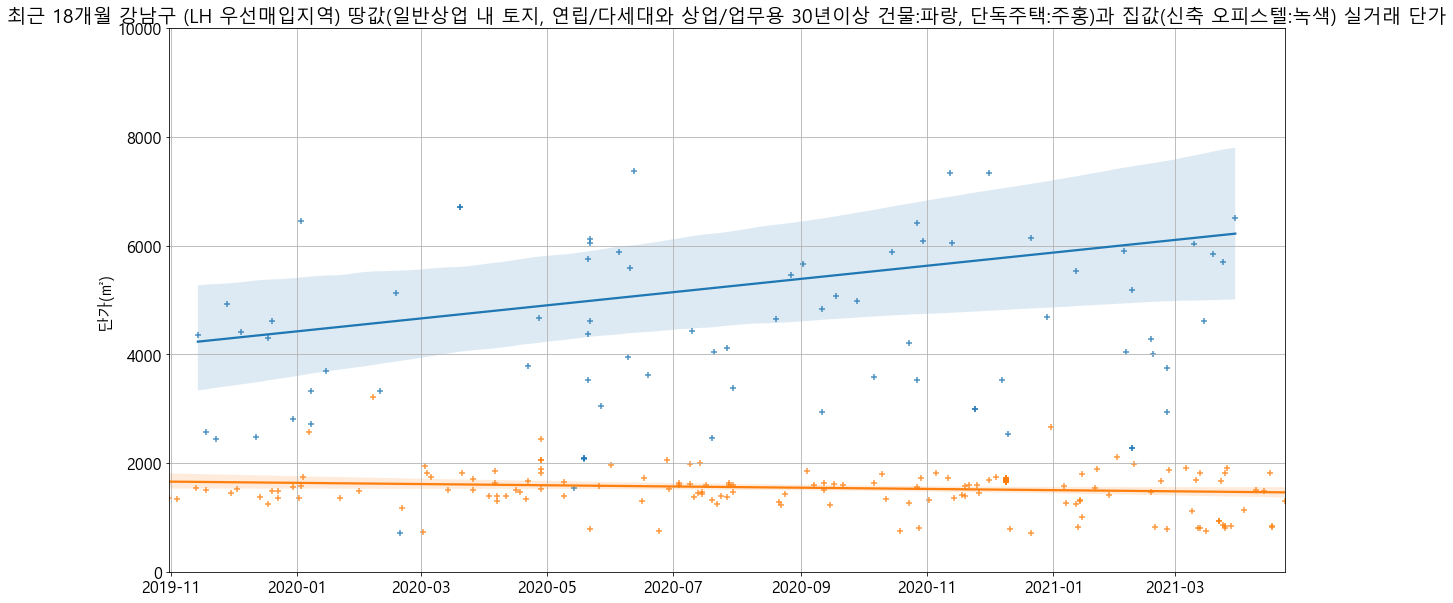

강동구 (LH 우선매입지역)
제2종일반주거지역    0.560641
개발제한구역       0.149364
제3종일반주거지역    0.147452
일반상업지역       0.051987
준주거지역        0.039939
자연녹지지역       0.033755
제1종일반주거지역    0.006216
근린상업지역       0.006024
제1종전용주거지역    0.004622
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

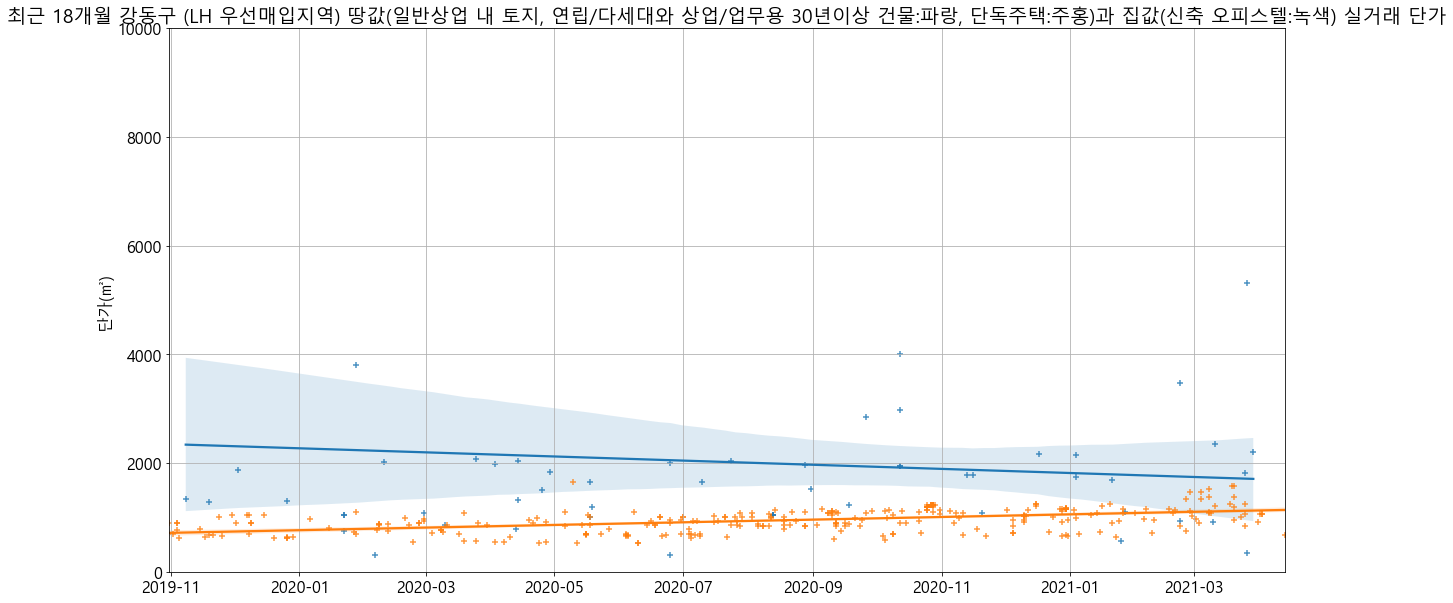

강북구 (SH 매입자제지역)
제2종일반주거지역    0.668358
제3종일반주거지역    0.139335
제1종일반주거지역    0.102700
준주거지역        0.044746
개발제한구역       0.021921
일반상업지역       0.019094
자연녹지지역       0.003847
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

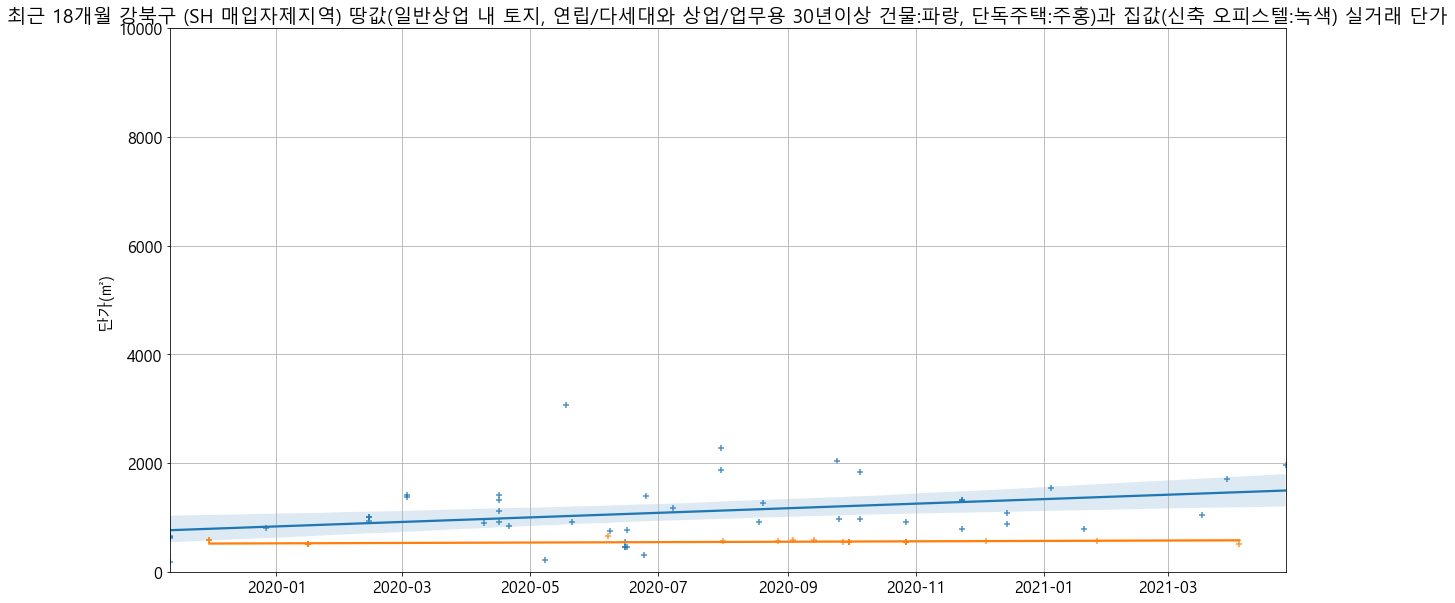

강서구 (SH 매입자제지역)
제2종일반주거지역    0.492063
개발제한구역       0.166674
제3종일반주거지역    0.118237
준공업지역        0.048483
제1종일반주거지역    0.045852
자연녹지지역       0.043018
일반상업지역       0.034537
제1종전용주거지역    0.018209
준주거지역        0.015148
근린상업지역       0.014218
생산녹지지역       0.003129
유통상업지역       0.000431
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

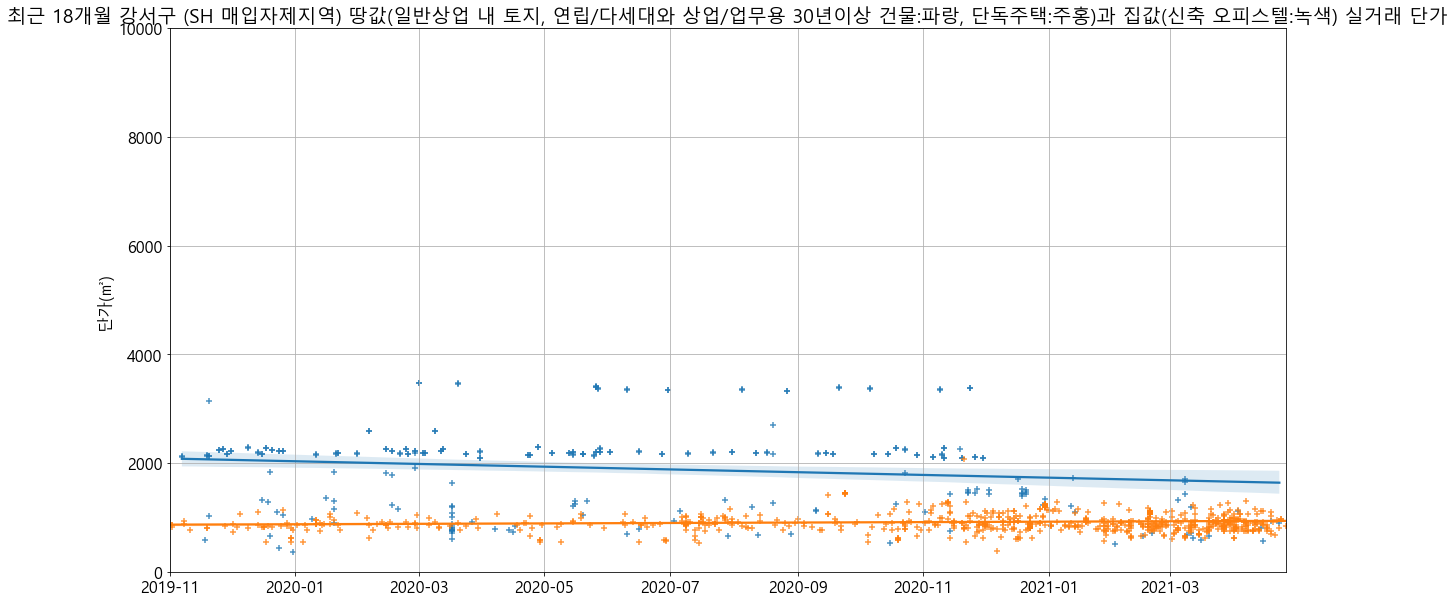

관악구 (LH 우선매입지역)
제2종일반주거지역    0.594294
제1종일반주거지역    0.148349
제3종일반주거지역    0.140943
준주거지역        0.065816
일반상업지역       0.029066
자연녹지지역       0.018364
개발제한구역       0.003168
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

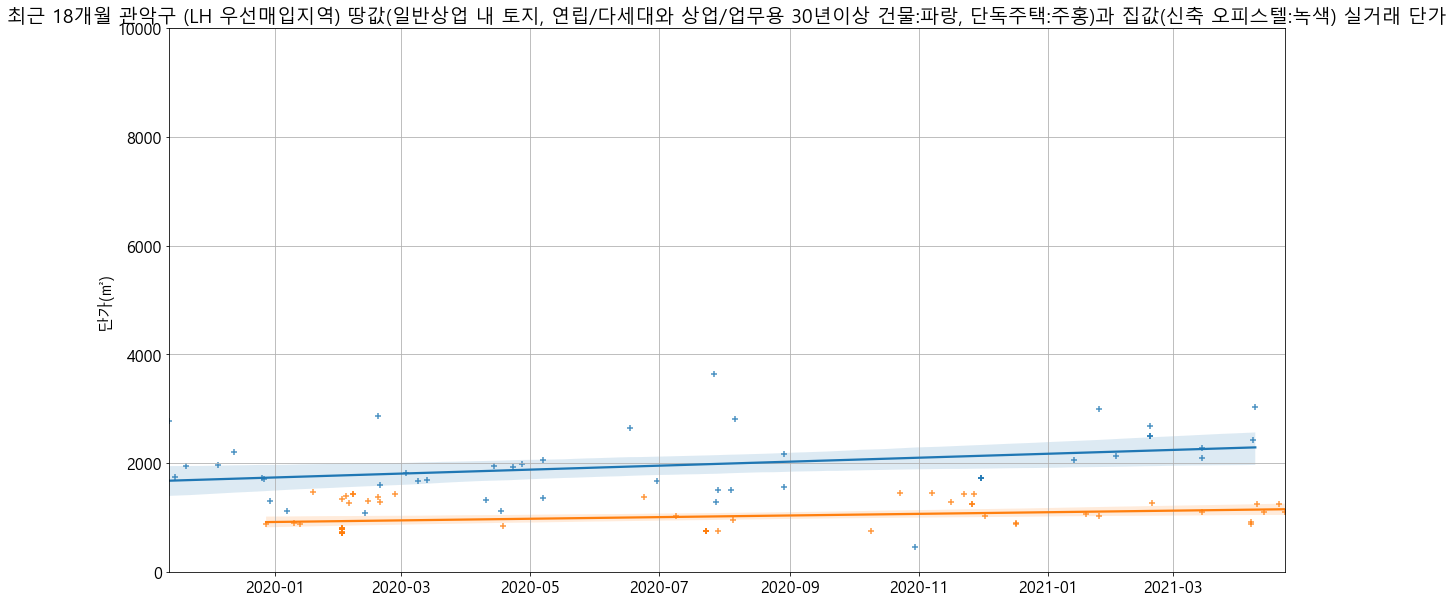

광진구 (LH 우선매입지역)
제2종일반주거지역    0.606749
제3종일반주거지역    0.149571
제1종일반주거지역    0.143499
준주거지역        0.056512
일반상업지역       0.019178
자연녹지지역       0.018302
개발제한구역       0.005342
제1종전용주거지역    0.000847
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

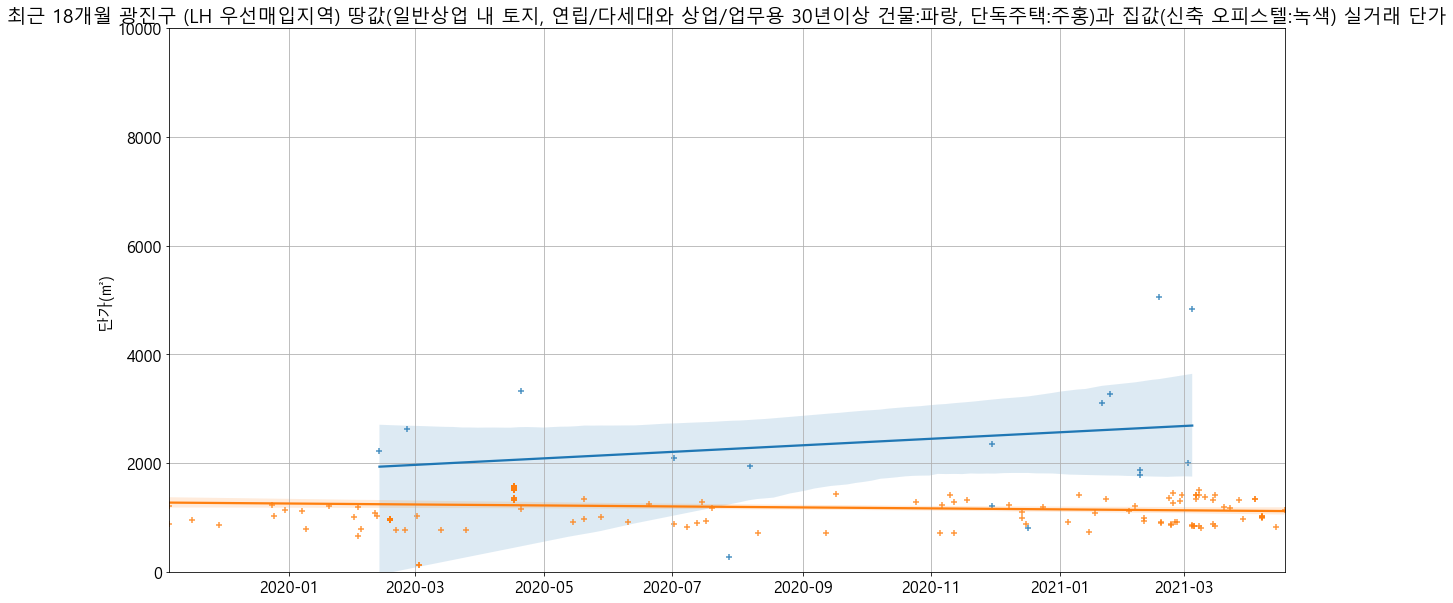

구로구
제2종일반주거지역    0.589826
제3종일반주거지역    0.163320
준공업지역        0.119224
제1종일반주거지역    0.041419
개발제한구역       0.034029
일반상업지역       0.019920
준주거지역        0.016145
자연녹지지역       0.015984
생산녹지지역       0.000134
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

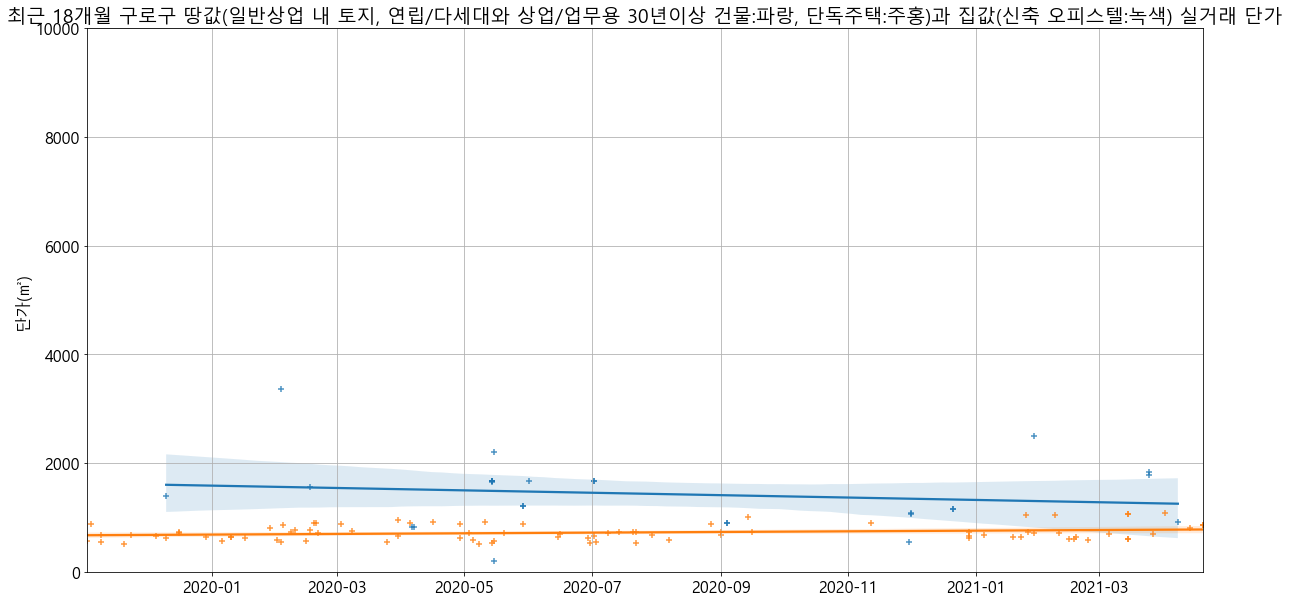

금천구 (SH 매입자제지역)
제2종일반주거지역    0.615310
준공업지역        0.166731
제1종일반주거지역    0.098816
준주거지역        0.043029
제3종일반주거지역    0.032987
일반상업지역       0.015620
개발제한구역       0.013729
자연녹지지역       0.008635
근린상업지역       0.005142
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

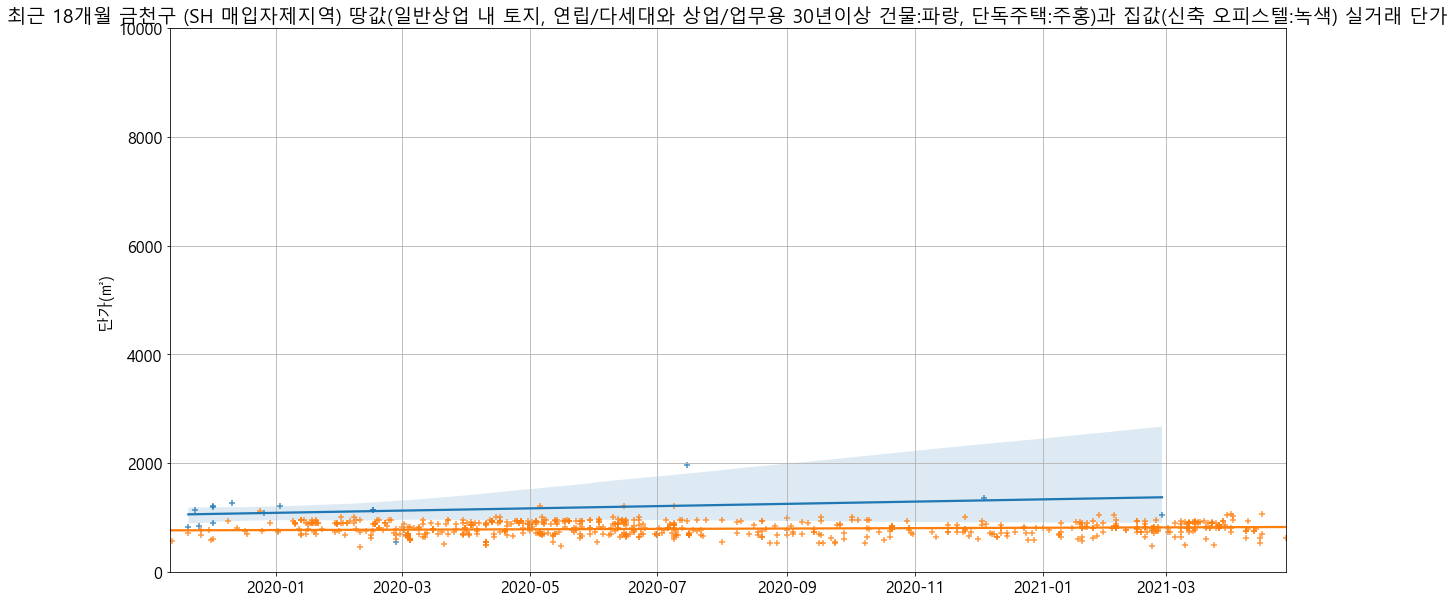

노원구
제2종일반주거지역    0.511469
제3종일반주거지역    0.194433
자연녹지지역       0.108019
제1종일반주거지역    0.064465
개발제한구역       0.061993
준주거지역        0.040686
일반상업지역       0.015325
제1종전용주거지역    0.003411
제2종전용주거지역    0.000198
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

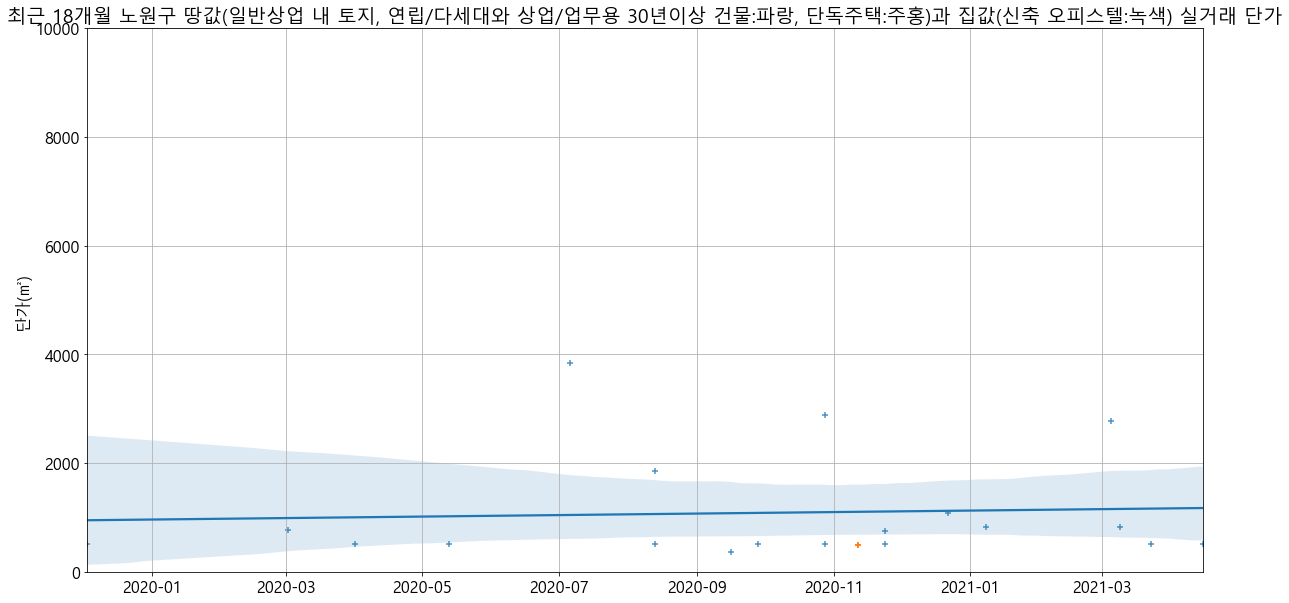

도봉구 (SH 매입자제지역)
제2종일반주거지역    0.513820
제1종일반주거지역    0.135397
제3종일반주거지역    0.099673
준공업지역        0.098878
개발제한구역       0.069981
준주거지역        0.036812
자연녹지지역       0.030572
일반상업지역       0.013820
근린상업지역       0.001047
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

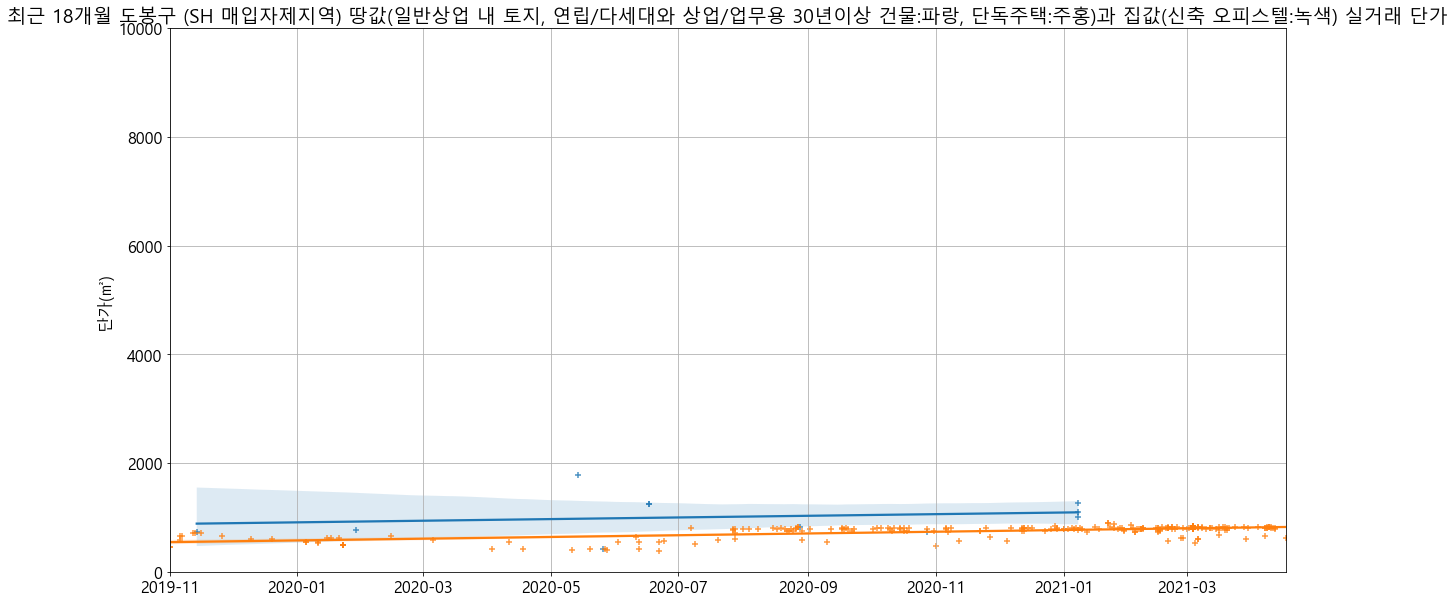

동대문구
제2종일반주거지역    0.646331
제3종일반주거지역    0.193450
준주거지역        0.058144
일반상업지역       0.048488
제1종일반주거지역    0.043555
근린상업지역       0.006437
자연녹지지역       0.003448
유통상업지역       0.000146
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

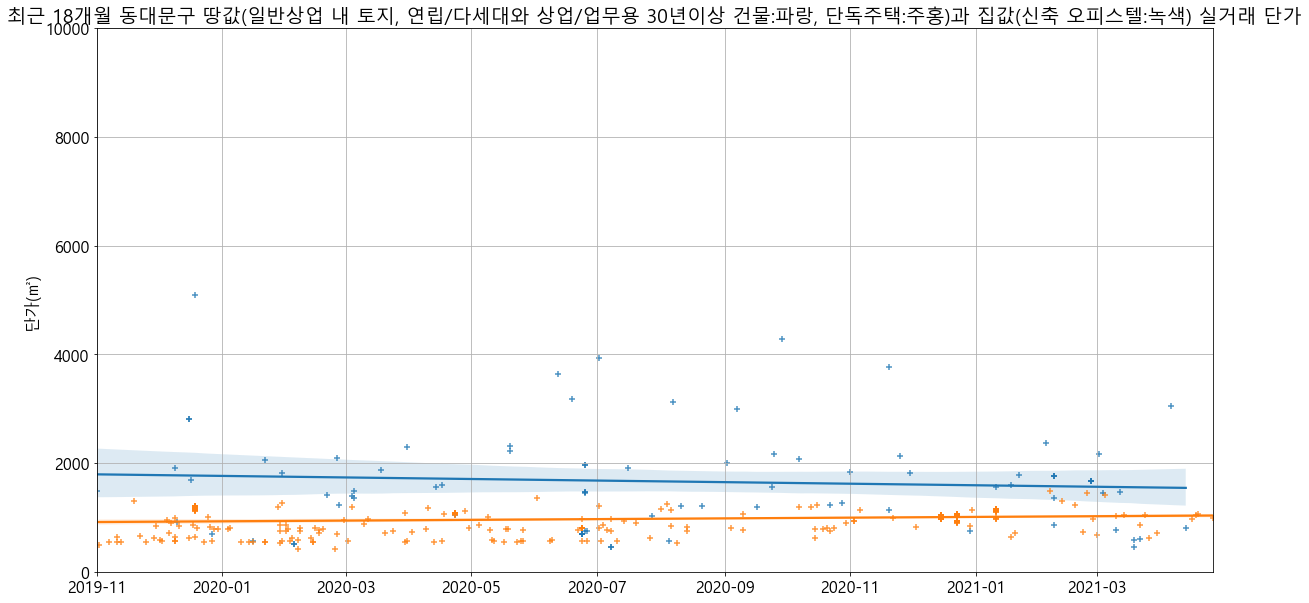

동작구 (LH 우선매입지역)
제2종일반주거지역    0.570354
제3종일반주거지역    0.226350
제1종일반주거지역    0.123807
준주거지역        0.034063
일반상업지역       0.025412
자연녹지지역       0.015629
근린상업지역       0.003560
유통상업지역       0.000825
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

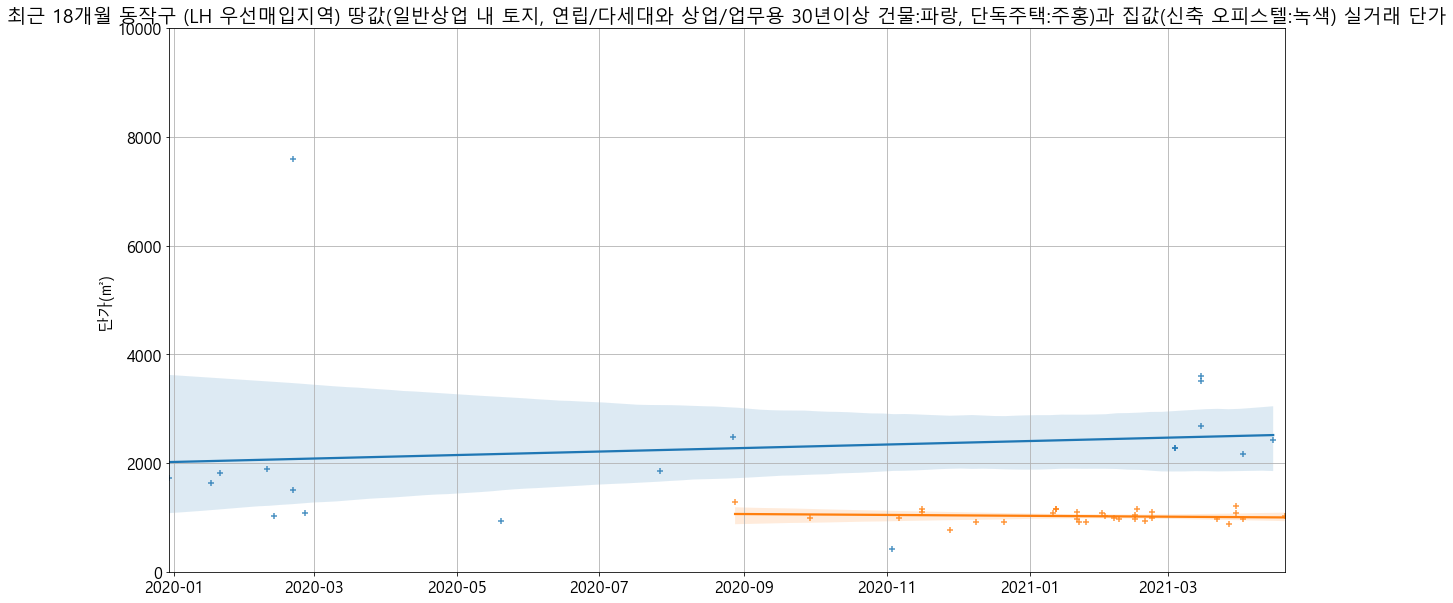

마포구 (LH 우선매입지역)
제2종일반주거지역    0.681805
제3종일반주거지역    0.168278
준주거지역        0.058293
자연녹지지역       0.041069
일반상업지역       0.028964
제1종일반주거지역    0.014198
근린상업지역       0.005037
유통상업지역       0.001361
개발제한구역       0.000955
중심상업지역       0.000041
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

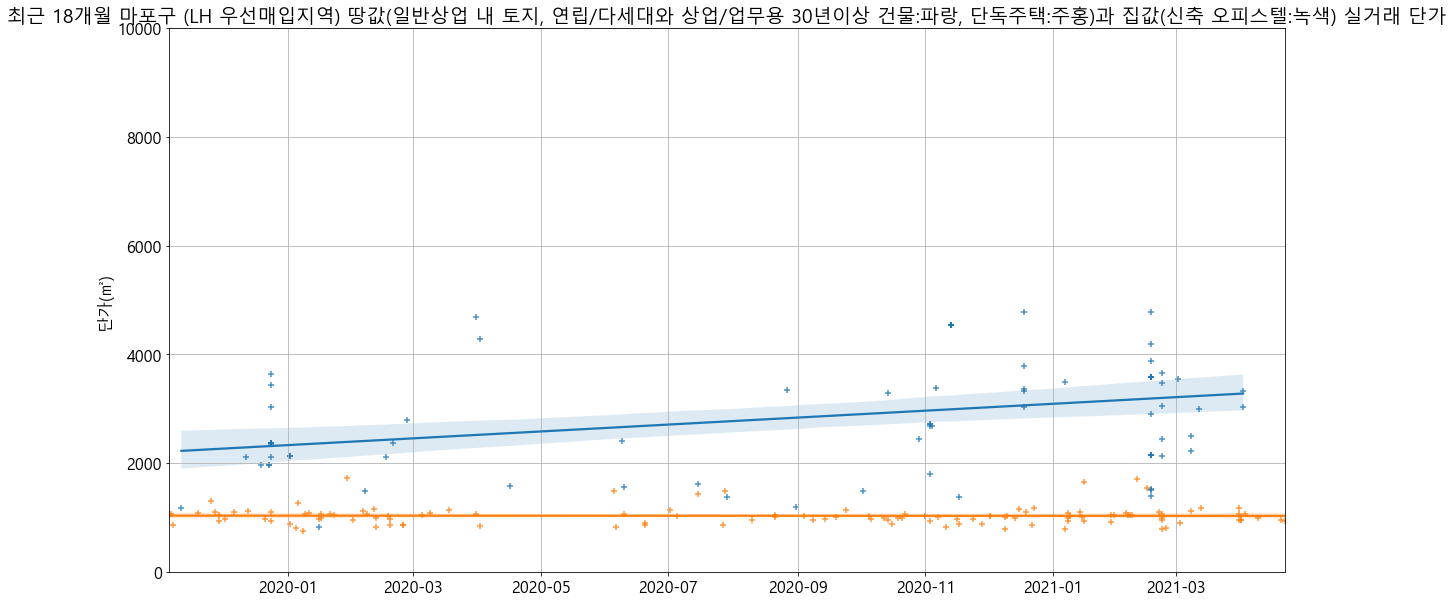

서대문구
제2종일반주거지역    0.551229
제3종일반주거지역    0.197188
제1종일반주거지역    0.147433
준주거지역        0.043361
일반상업지역       0.026351
제1종전용주거지역    0.021412
개발제한구역       0.009162
자연녹지지역       0.003008
근린상업지역       0.000856
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

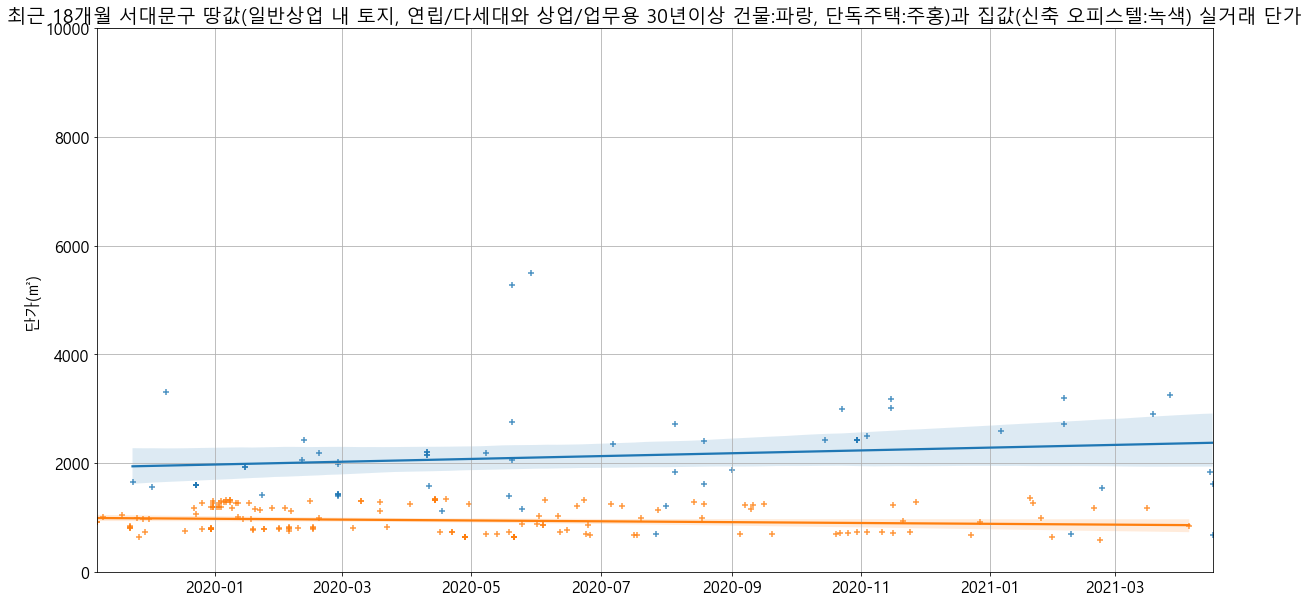

서초구 (LH 우선매입지역)
제2종일반주거지역    0.371500
개발제한구역       0.224711
제3종일반주거지역    0.183099
제1종일반주거지역    0.070535
제1종전용주거지역    0.061390
자연녹지지역       0.042982
일반상업지역       0.039914
준주거지역        0.005868
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

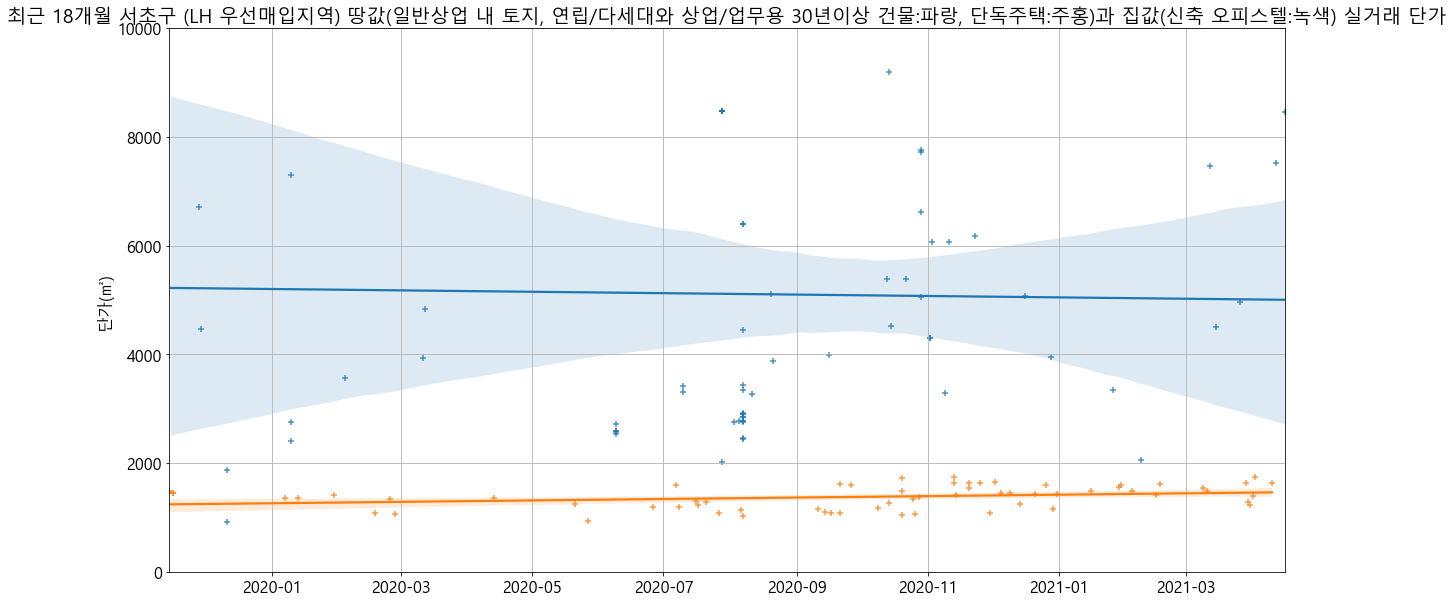

성동구 (LH 우선매입지역)
제2종일반주거지역    0.497561
제3종일반주거지역    0.280755
준공업지역        0.107595
제1종일반주거지역    0.033974
자연녹지지역       0.030231
준주거지역        0.027679
일반상업지역       0.019454
근린상업지역       0.002155
유통상업지역       0.000596
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

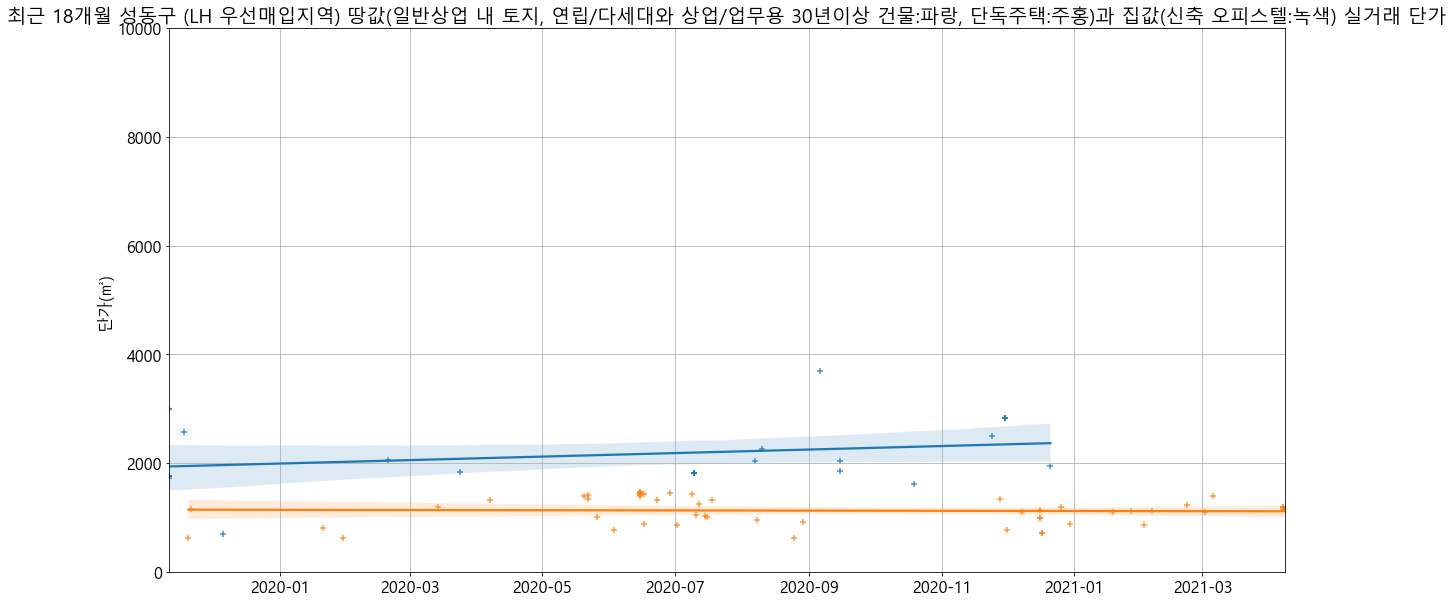

성북구 (SH 매입자제지역)
제2종일반주거지역    0.582308
제1종일반주거지역    0.147546
제3종일반주거지역    0.137515
준주거지역        0.051835
제1종전용주거지역    0.037150
일반상업지역       0.027135
자연녹지지역       0.006463
개발제한구역       0.005378
근린상업지역       0.004670
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

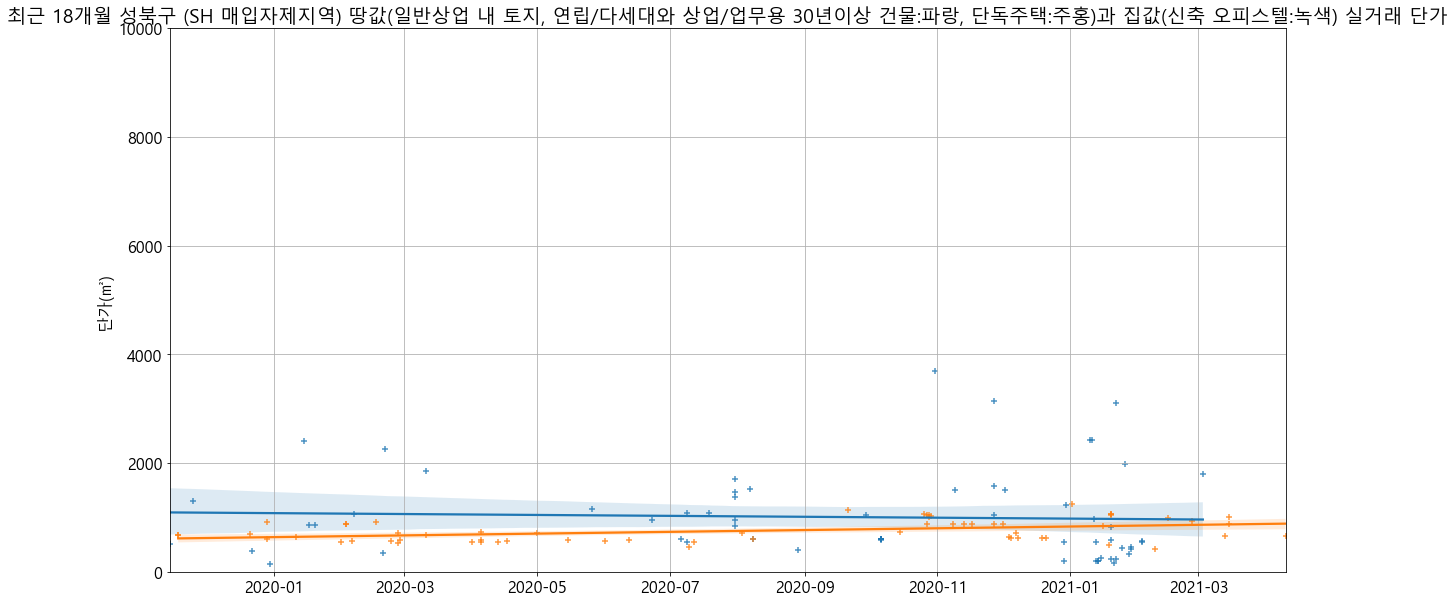

송파구 (LH 우선매입지역)
제2종일반주거지역    0.633170
제3종일반주거지역    0.205408
자연녹지지역       0.052292
제1종일반주거지역    0.034043
준주거지역        0.028101
개발제한구역       0.019856
일반상업지역       0.018613
생산녹지지역       0.007275
유통상업지역       0.001000
근린상업지역       0.000243
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

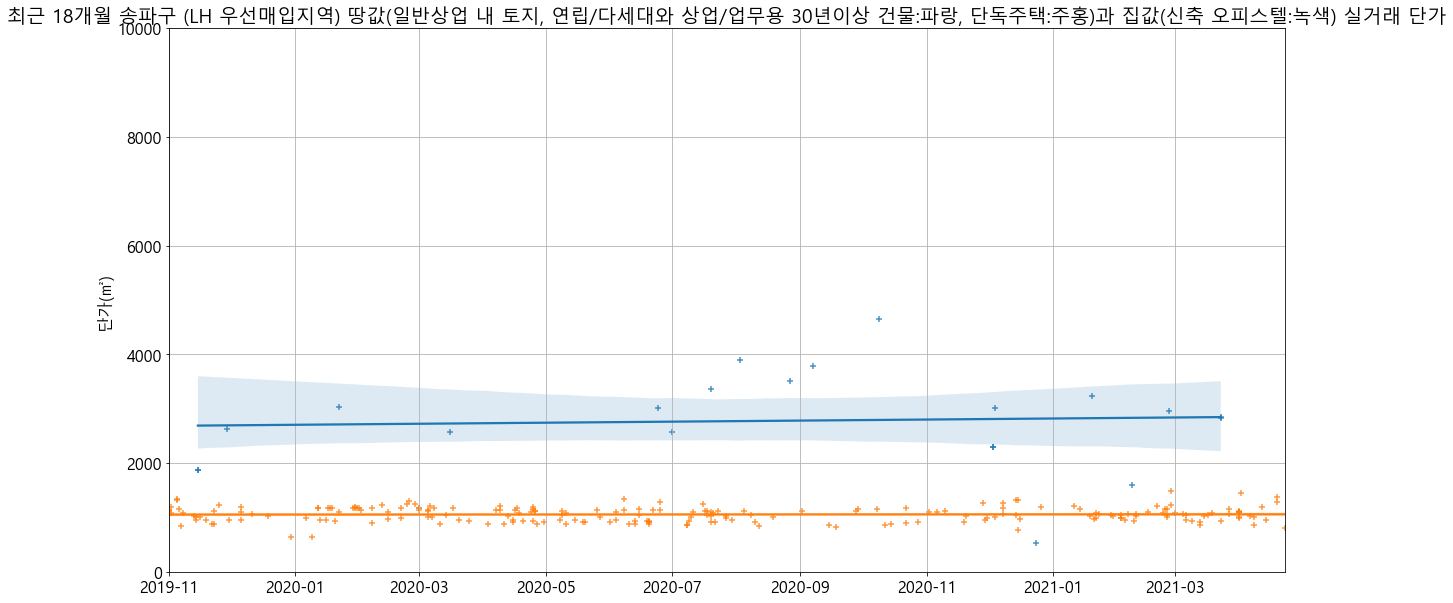

양천구 (LH 우선매입지역) (SH 매입자제지역)
제2종일반주거지역    0.660556
제3종일반주거지역    0.173699
제1종일반주거지역    0.070941
준주거지역        0.044858
자연녹지지역       0.023378
일반상업지역       0.010659
근린상업지역       0.007954
개발제한구역       0.007429
준공업지역        0.000525
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

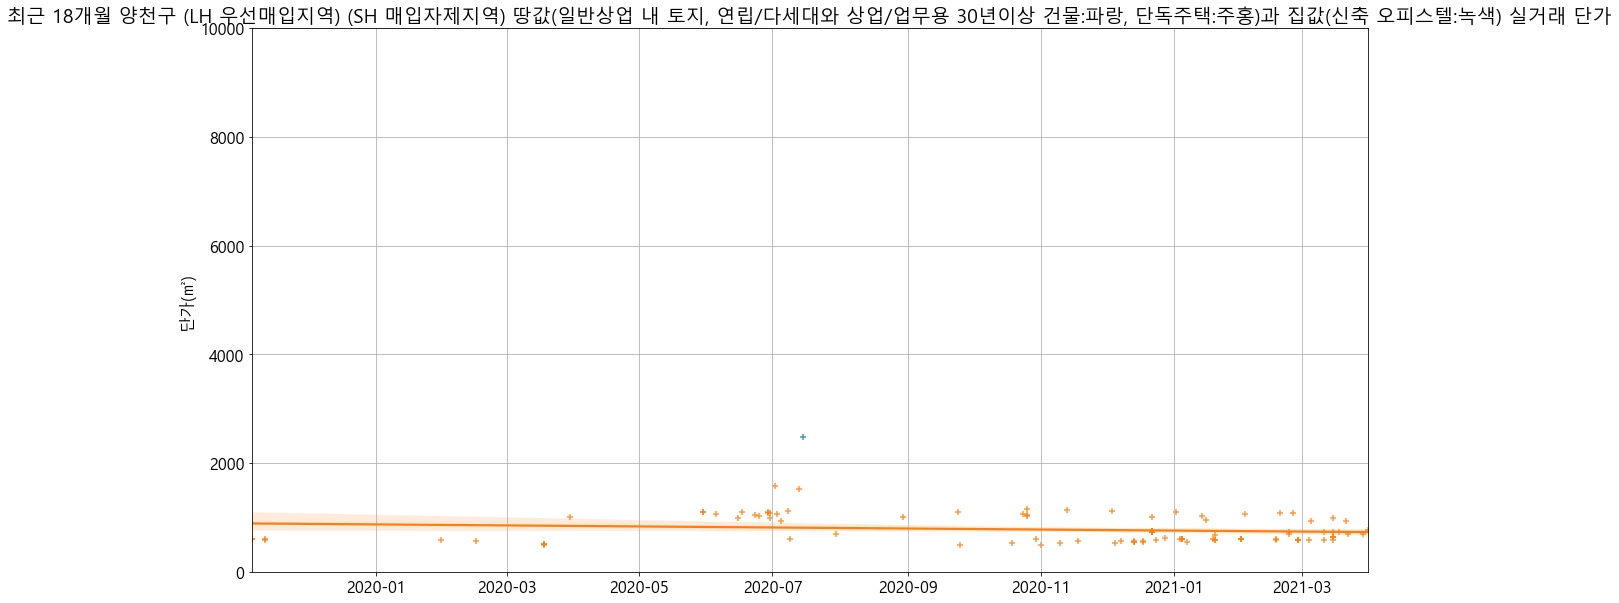

영등포구 (LH 우선매입지역)
제2종일반주거지역    0.548835
준공업지역        0.221417
준주거지역        0.094589
일반상업지역       0.061309
제3종일반주거지역    0.037180
자연녹지지역       0.025525
근린상업지역       0.005761
제1종일반주거지역    0.005384
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

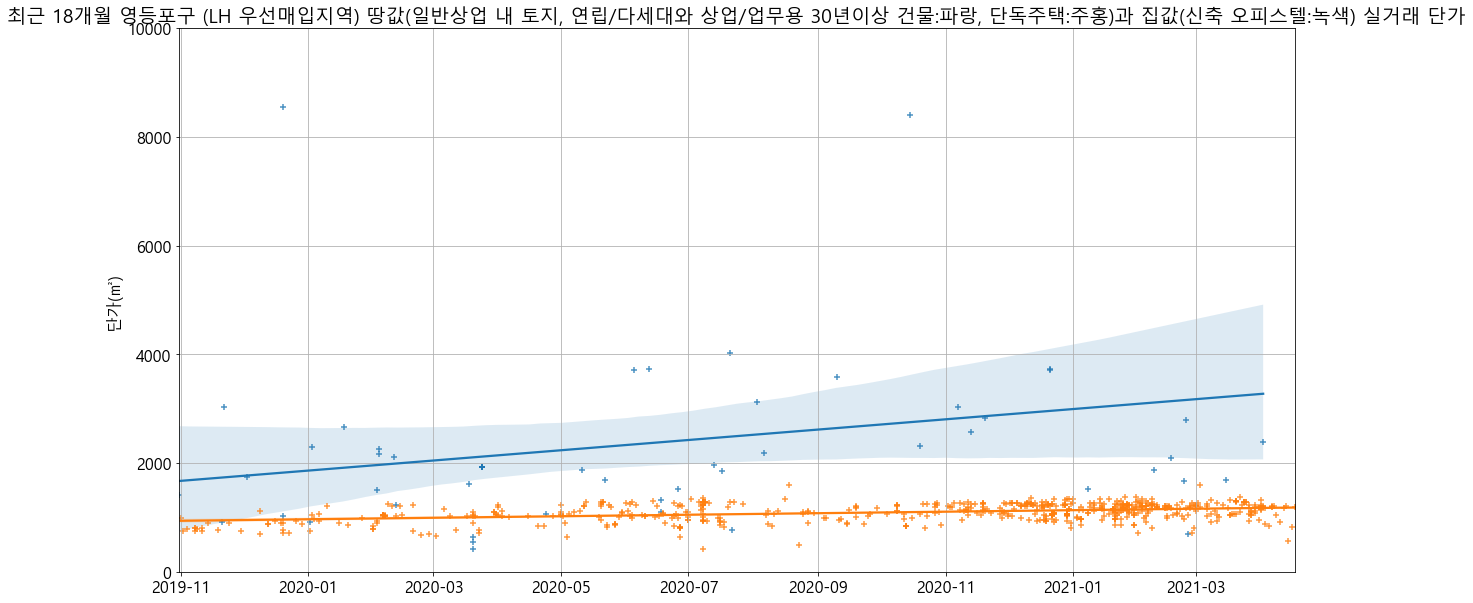

용산구 (LH 우선매입지역)
제2종일반주거지역    0.485986
제1종일반주거지역    0.231573
제3종일반주거지역    0.105658
일반상업지역       0.100891
준주거지역        0.055038
제1종전용주거지역    0.010898
자연녹지지역       0.008590
보전녹지지역       0.001365
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

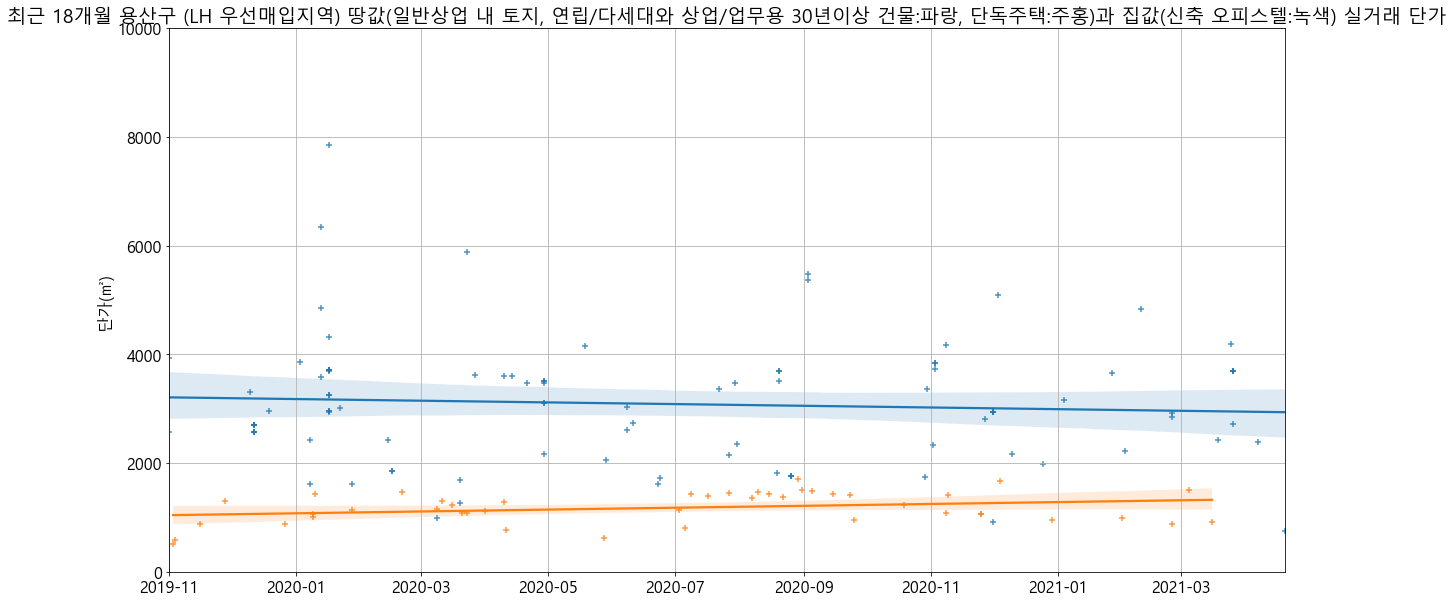

은평구
제2종일반주거지역    0.599357
제3종일반주거지역    0.143918
제1종일반주거지역    0.098237
준주거지역        0.062090
개발제한구역       0.053014
일반상업지역       0.026076
근린상업지역       0.009592
제1종전용주거지역    0.006127
자연녹지지역       0.001168
제2종전용주거지역    0.000421
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

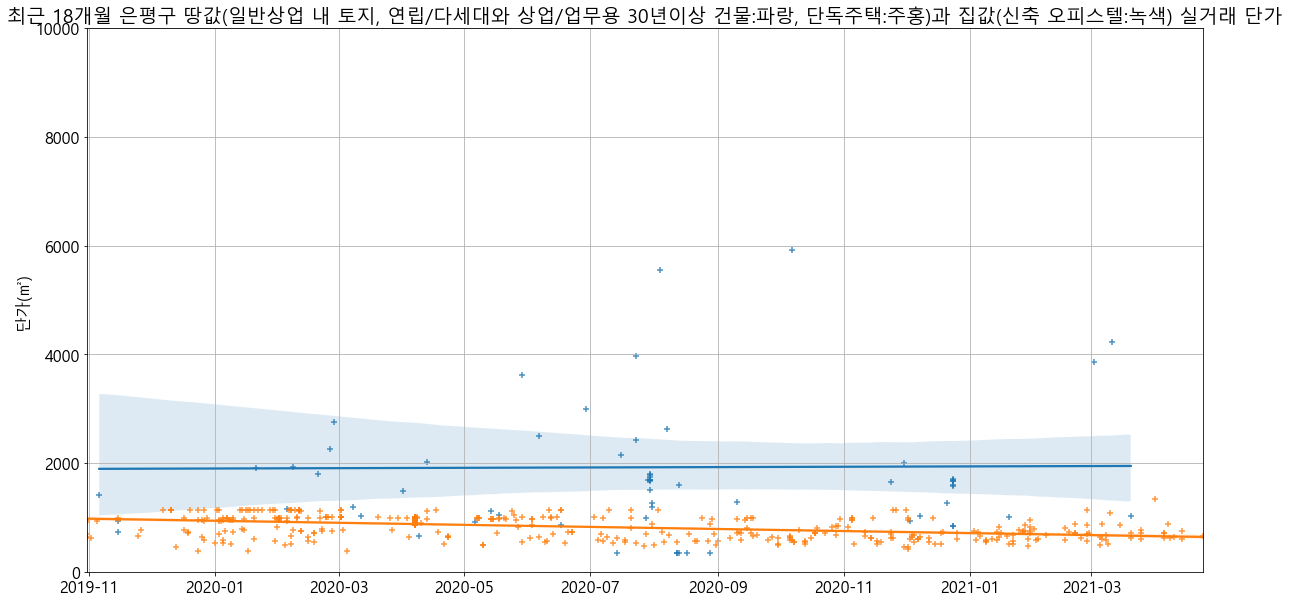

종로구 (LH 우선매입지역)
제2종일반주거지역    0.313945
일반상업지역       0.270508
제1종일반주거지역    0.237993
제3종일반주거지역    0.072814
제1종전용주거지역    0.053615
개발제한구역       0.030220
준주거지역        0.012119
자연녹지지역       0.008786
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

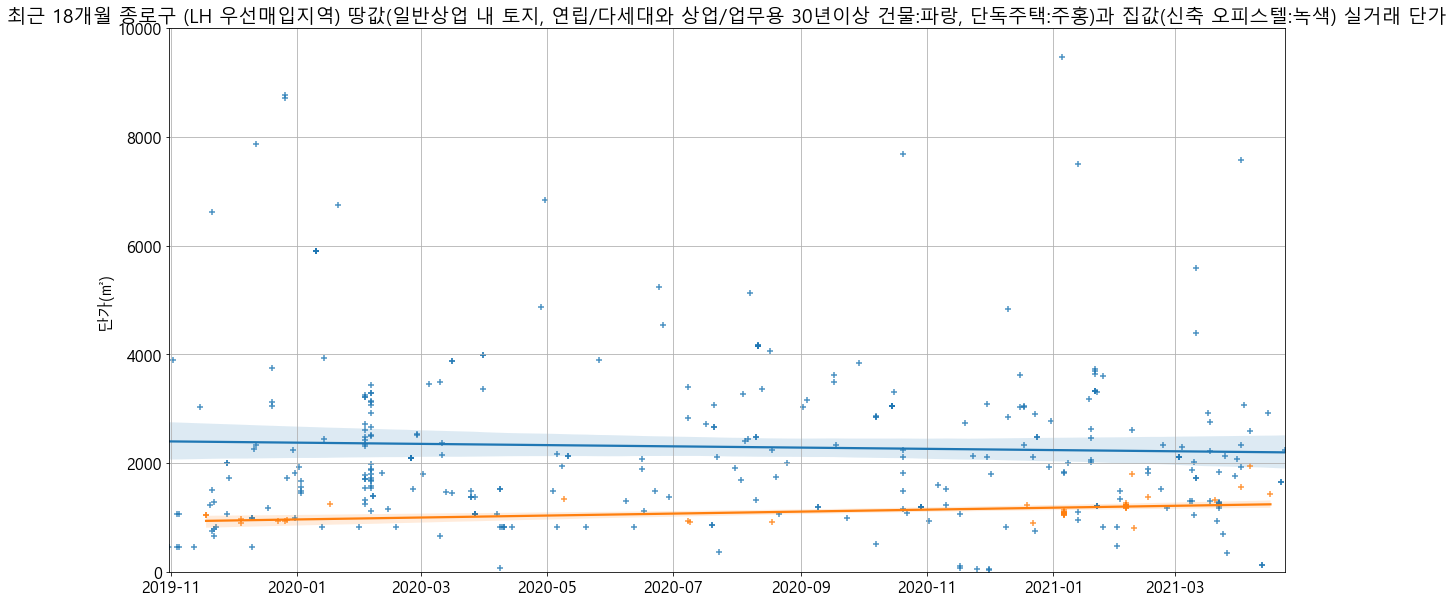

중구 (LH 우선매입지역)
일반상업지역       0.465296
제2종일반주거지역    0.304450
제1종일반주거지역    0.088481
제3종일반주거지역    0.075818
준주거지역        0.035659
중심상업지역       0.029380
자연녹지지역       0.000916
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

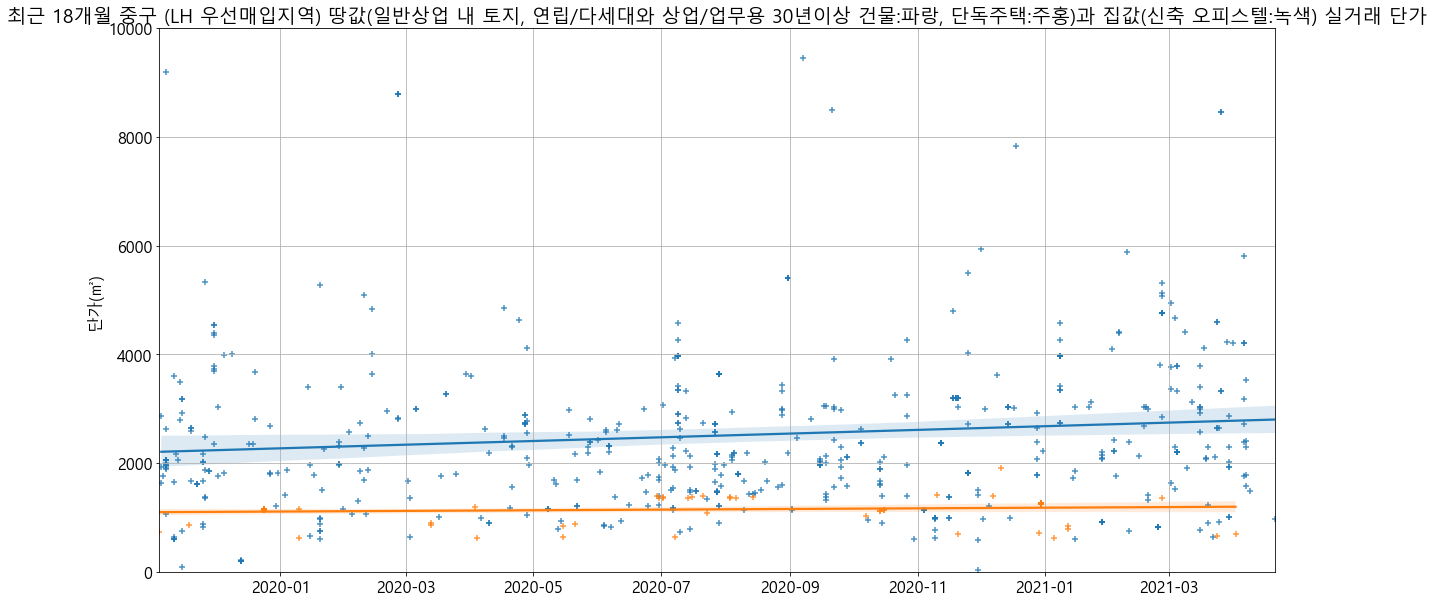

중랑구 (SH 매입자제지역)
제2종일반주거지역    0.628077
제3종일반주거지역    0.172648
준주거지역        0.059627
제1종일반주거지역    0.047807
개발제한구역       0.040022
자연녹지지역       0.029085
일반상업지역       0.012680
근린상업지역       0.010053
Name: 용도지역명1, dtype: float64


<Figure size 432x288 with 0 Axes>

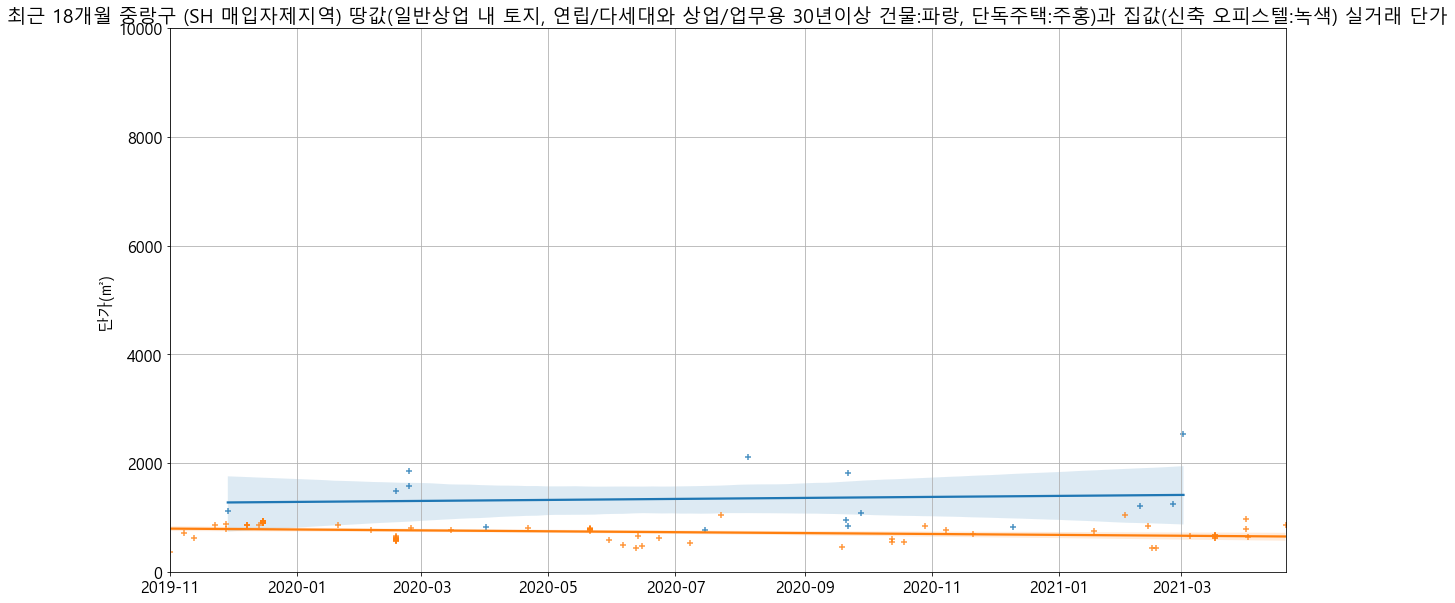

<Figure size 432x288 with 0 Axes>

In [45]:
target_purpose = '일반상업'
font = {'size': 16}
matplotlib.rc('font', **font)
count = 0
date_today = pd.to_datetime(datetime.datetime.now())
for gu in gu_list:    
    lh_preferred_area = 0
    sh_non_preferred_area = 0
    if gu in lh_preferred_areas_list:
        lh_preferred_area = 1
        
    if gu in sh_non_preferred_areas_list:
        sh_non_preferred_area = 1
    
    last_addr_df = last_df[
        (last_df['구'] == gu)
    ]
    
    val_counts = last_addr_df['용도지역명1'].value_counts(normalize=True)
    
    common_addr_df = common_df[
        (common_df['구'] == gu)
        &(common_df['용도지역'].str.contains(target_purpose))
        &(common_df['계약날짜'] >= date_today - pd.DateOffset(months=18))
    ]
    
    officetel_addr_df = officetel_df[
        (officetel_df['구'] == gu)
        &(officetel_df['계약날짜'] >= date_today - pd.DateOffset(months=18))
        &(officetel_df['건물연식'] < 5)
    ]
    
    
    if lh_preferred_area == 1:
        gu += ' (LH 우선매입지역)'
        
    if sh_non_preferred_area == 1:
        gu += ' (SH 매입자제지역)'
    
    print(gu)
    
    print(val_counts)
    
    val_counts_df = pd.DataFrame({'{}'.format(gu):[idx for idx in val_counts.index],
                                  '비율':[v for v in val_counts.values]
                                 })
    
    val_counts_df.to_excel('./국토교통부_실거래가_공개시스템/땅집값 비교분석4/{}_용도지역_비율.xlsx'.format(gu), index=False)
    
    f, ax = plt.subplots(figsize=(20,10))
    plt.title('최근 18개월 {} 땅값({} 내 토지, 연립/다세대와 상업/업무용 30년이상 건물:파랑, 단독주택:주홍)과 집값(신축 오피스텔:녹색) 실거래 단가'.format(gu, target_purpose))
    plt.grid(True)
    ax.xaxis.update_units(common_addr_df['계약날짜'])
    sns.regplot(x=ax.xaxis.convert_units(common_addr_df['계약날짜']), y=common_addr_df['단가(㎡)'], #ci=None,# order=2,
                marker='+'#, robust=True
               )
    ax.xaxis.update_units(officetel_addr_df['계약날짜'])
    sns.regplot(x=ax.xaxis.convert_units(officetel_addr_df['계약날짜']), y=officetel_addr_df['단가(㎡)'], #ci=None,# order=2,
                marker='+'#, robust=True
               )
    plt.ylim([0, 10000])
    plt.savefig('국토교통부_실거래가_공개시스템/땅집값 비교분석4/{}.png'.format(gu))
    
    plt.show()
    plt.clf()

In [31]:
last_df.head()

,지번주소,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,구
0,서울특별시 강남구 개포동 100-0,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,강남구
1,서울특별시 강남구 개포동 101-0,전,641.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,강남구
2,서울특별시 강남구 개포동 102-0,전,509.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,강남구
3,서울특별시 강남구 개포동 103-0,전,48.7,자연녹지지역,개발제한구역,전,평지,부정형,맹지,강남구
4,서울특별시 강남구 개포동 104-1,전,2995.0,개발제한구역,자연녹지지역,전,완경사,부정형,맹지,강남구


In [38]:
gangnam_df = last_df[last_df['지번주소'].str.contains(' 강남구')]
print(gangnam_df.shape)
gangnam_df.head()

(33947, 11)


,지번주소,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,구,동
0,서울특별시 강남구 개포동 100-0,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,강남구,개포동
1,서울특별시 강남구 개포동 101-0,전,641.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,강남구,개포동
2,서울특별시 강남구 개포동 102-0,전,509.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,강남구,개포동
3,서울특별시 강남구 개포동 103-0,전,48.7,자연녹지지역,개발제한구역,전,평지,부정형,맹지,강남구,개포동
4,서울특별시 강남구 개포동 104-1,전,2995.0,개발제한구역,자연녹지지역,전,완경사,부정형,맹지,강남구,개포동


In [39]:
sangup_df = gangnam_df[gangnam_df['용도지역명1'].str.contains('일반상업')]
print(sangup_df.shape)
sangup_df.head()

(3094, 11)


,지번주소,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,구,동
1500,서울특별시 강남구 개포동 13-3,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,강남구,개포동
1501,서울특별시 강남구 개포동 13-4,철도용지,404.6,일반상업지역,지정되지않음,도로등,지정되지않음,지정되지않음,지정되지않음,강남구,개포동
1527,서울특별시 강남구 개포동 14-1,대,1087.8,일반상업지역,지정되지않음,상업용,평지,사다리형,중로각지,강남구,개포동
1528,서울특별시 강남구 개포동 14-2,대,1087.7,일반상업지역,지정되지않음,상업기타,평지,세로장방,소로한면,강남구,개포동
1529,서울특별시 강남구 개포동 14-3,종교용지,1652.8,일반상업지역,지정되지않음,상업기타,평지,세로장방,중로한면,강남구,개포동


In [40]:
sangup_df['동'].unique()

array(['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '역삼동',
       '일원동', '자곡동', '청담동'], dtype=object)

In [41]:
common_addr_df = common_df[
        (common_df['구'] == '강남구')
        &(common_df['용도지역'].str.contains(target_purpose))
        &(common_df['계약날짜'] >= date_today - pd.DateOffset(months=18))
    ]

In [42]:
common_addr_df.shape

(84, 13)

In [43]:
common_addr_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식,구,동
304248,서울특별시 강남구 삼성동,140-32,일반상업지역,25m미만,2020-05-19,87.68,182700.0,2083.713504,6888.308845,연립다세대,37.0,강남구,삼성동
304249,서울특별시 강남구 삼성동,140-32,일반상업지역,25m미만,2020-05-19,87.68,183000.0,2087.135036,6899.619697,연립다세대,37.0,강남구,삼성동
304250,서울특별시 강남구 삼성동,140-32,일반상업지역,25m미만,2020-05-19,87.68,183000.0,2087.135036,6899.619697,연립다세대,37.0,강남구,삼성동
29179,서울특별시 강남구 논현동,9*,일반상업,25m이상,2019-11-14,653.20,2840000.0,4347.826087,14372.978261,상업업무,31.0,강남구,논현동
29181,서울특별시 강남구 논현동,2**,일반상업,25m이상,2019-11-28,568.30,2800000.0,4926.975189,16287.520676,상업업무,29.0,강남구,논현동


In [44]:
common_addr_df['동'].value_counts()

역삼동    26
논현동    21
삼성동    17
신사동     6
청담동     5
대치동     4
수서동     3
도곡동     1
자곡동     1
Name: 동, dtype: int64